# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sweetviz as sv

In [3]:
train = pd.read_csv('train-data.csv')

#my_report = sv.analyze(train)
#my_report.show_html()

In [4]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
train.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [6]:
train.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [7]:
#train.fillna('NONE', inplace = True)

In [8]:
test = pd.read_csv('test-data.csv')
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [9]:
test.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [10]:
train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

# Data Preprocessing

In [11]:
#unique values in categorical columns
train[['Name','Location','Fuel_Type','Transmission','Owner_Type']].nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

#### Null value treatment

In [12]:
train.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Looks like we have some null values in our dataset, but first we have to deal with categorical data

In [13]:
train['Power'].dtypes

dtype('O')

In [14]:
train["Power"]

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [15]:
train['Power'] = train['Power'].str.replace('bhp', '')
test['Power'] = test['Power'].str.replace('bhp', '')

In [16]:
train['Engine'] = train['Engine'].str.replace('CC','')
test['Engine'] = test['Engine'].str.replace('CC','')

In [17]:
train['Mileage'] = train['Engine'].str.replace('kmpl' or 'km/kg', '')
test['Mileage'] = test['Engine'].str.replace('kmpl' or 'km/kg', '')

In [18]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,1582,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,1199,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,1968,140.8,5.0,17.74


In [19]:
#Converting to numerical type
train['Mileage'] = pd.to_numeric(train['Mileage'].astype(str).str[:-1], errors='coerce')
train['Engine'] = pd.to_numeric(train['Engine'].astype(str).str[:-1], errors='coerce')
train['Power'] = pd.to_numeric(train['Power'].astype(str).str[:-1], errors='coerce')
test['Mileage'] = pd.to_numeric(test['Mileage'].astype(str).str[:-1], errors='coerce')
test['Engine'] = pd.to_numeric(test['Engine'].astype(str).str[:-1], errors='coerce')
test['Power'] = pd.to_numeric(test['Power'].astype(str).str[:-1], errors='coerce')

Am replacing the null values with Median, because it is robust to outliers

In [20]:
#Treating null values
train['Mileage'].fillna((train['Mileage'].median()), inplace=True)
train['Engine'].fillna((train['Engine'].median()), inplace=True)
train['Power'].fillna((train['Power'].median()), inplace=True)
train['Seats'].fillna((train['Seats'].median()), inplace=True)
test['Mileage'].fillna((test['Mileage'].median()), inplace=True)
test['Engine'].fillna((test['Engine'].median()), inplace=True)
test['Power'].fillna((test['Power'].median()), inplace=True)
test['Seats'].fillna((test['Seats'].median()), inplace=True)

In [22]:
train.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### Outlier treatment

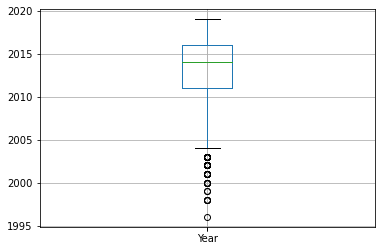

In [32]:
train.boxplot(column=['Year'])

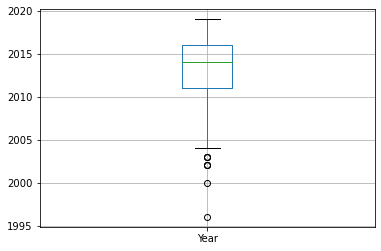

In [33]:
test.boxplot(column = ['Year'])